# LeNet

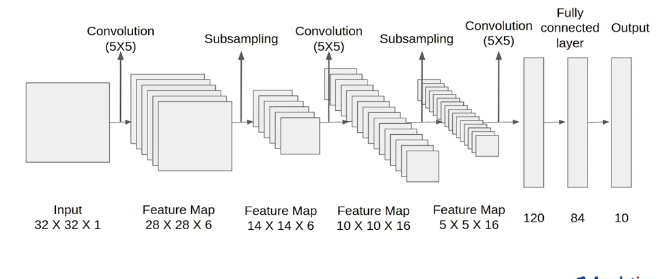

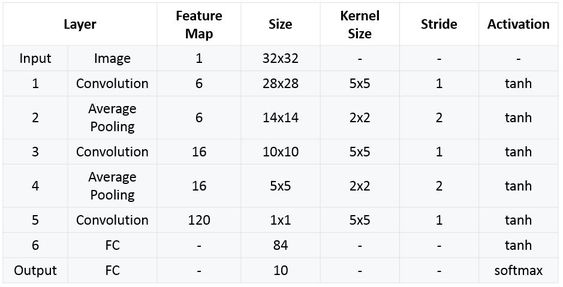

In [1]:
import torch
from torchsummary import summary

In [2]:
class LeNet(torch.nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5, 5), stride=(1, 1), padding=0)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1))
        self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5), stride=(1, 1))
        self.fc1 = torch.nn.Linear(in_features=120, out_features=84)
        self.fc2 = torch.nn.Linear(in_features=84, out_features=10)
        # self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.avgpool = torch.nn.AvgPool2d(kernel_size=(2, 2), stride=(2,2))
    
    def forward(self, img): 
        # img: BSx3x32x32
        img = self.avgpool(self.tanh(self.conv1(img)))
        # conv1: BSx6x28x28 // avgpool: BSx6x14x14
        img = self.avgpool(self.tanh(self.conv2(img)))
        # conv2: BSx16x10x10 // avgpool: BSx16x5x5
        img = self.tanh(self.conv3(img))
        # conv3: BSx120x1x1
        img = img.reshape(img.shape[0], -1)
        # flatten: BSx120
        img = self.tanh(self.fc1(img))
        img = self.fc2(img)
        return img

In [3]:
model = LeNet()

random_batch = torch.randn(12, 3, 32, 32)
output = model(random_batch)

print(f"{output.shape}\n\n{output}")

torch.Size([12, 10])

tensor([[ 1.1137e-01, -4.2999e-03, -1.1603e-01,  1.1829e-02, -9.0745e-04,
         -9.7960e-02,  7.9988e-03,  1.0240e-01,  1.9350e-02,  1.3485e-01],
        [ 1.1468e-01, -4.3048e-02, -1.0514e-01,  1.4311e-02, -9.8194e-03,
         -5.7432e-02,  2.1542e-02,  1.0069e-01,  5.0490e-03,  1.2159e-01],
        [ 1.2208e-01, -2.1961e-02, -1.3152e-01,  2.3402e-02,  4.1174e-02,
         -6.3222e-02,  1.9690e-02,  8.0363e-02,  1.2946e-02,  1.3198e-01],
        [ 1.2114e-01, -2.4750e-02, -1.4780e-01,  1.9238e-02,  1.1914e-03,
         -7.4398e-02,  3.0859e-02,  7.8639e-02,  3.2904e-02,  1.5837e-01],
        [ 9.8940e-02, -2.2546e-02, -1.1910e-01, -3.1851e-05, -2.2509e-03,
         -5.1574e-02,  3.6381e-02,  9.3964e-02,  4.4807e-02,  1.2247e-01],
        [ 1.1429e-01,  7.7908e-04, -1.4563e-01,  1.5021e-02, -4.3106e-03,
         -3.6773e-02,  2.1900e-02,  1.1847e-01,  3.2828e-02,  1.4051e-01],
        [ 1.2095e-01, -1.2459e-02, -1.1590e-01,  1.6622e-02,  1.2805e-02,
         -

In [4]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8            [-1, 120, 1, 1]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

In [5]:
trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
trainable_parameters

62006